<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Optimisation%20Parameters%20without%205-fold%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 7.8 MB/s eta 0:00:00


In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [6]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [32]:
# Split the data into training and test sets
X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values


In [33]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Convert to panda dataframe with specified column names
column_names = ['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature', 'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3']
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

In [53]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:
# Initialize the model
lm = LinearRegression()

In [55]:
# Define the parameter grid
param_grid = {'fit_intercept':[True,False]}

In [56]:
# Initialize the grid search object
grid = GridSearchCV(lm, param_grid)

In [57]:
# Fit the grid search object to the data
grid.fit(X_train_poly, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [58]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [59]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [60]:
r2 = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)

print("r2_score:", r2)
print("mean_absolute_error:", MAE)
print("mean_squared_error:", MSE)

r2_score: 0.852029934722351
mean_absolute_error: 3.620881163995732
mean_squared_error: 36.37257060418083


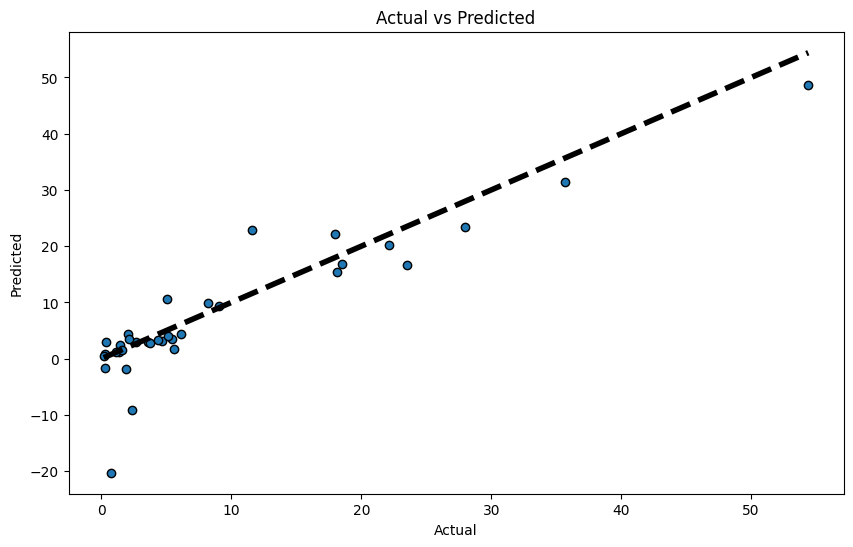

In [26]:
# Visualize the results
# scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



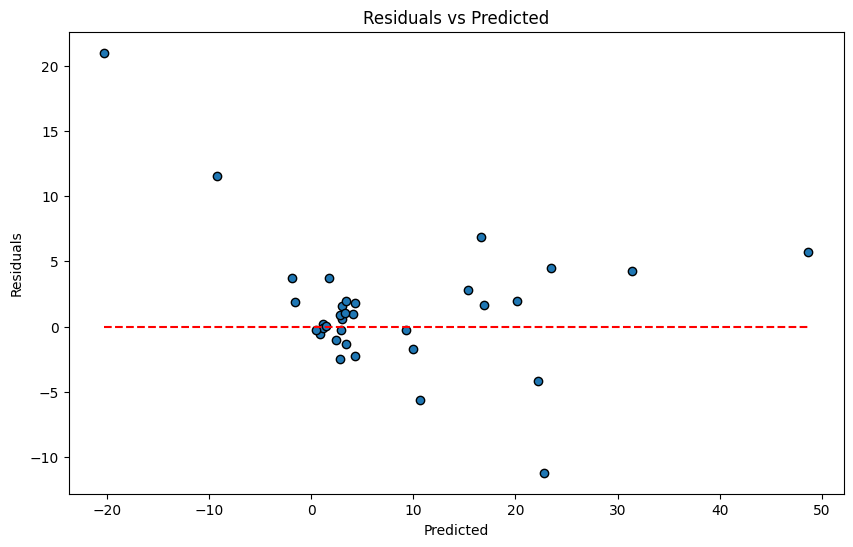

In [28]:
# Residual plots
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()
